### CLUSTERING

##### K-Mean clustering

In [37]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

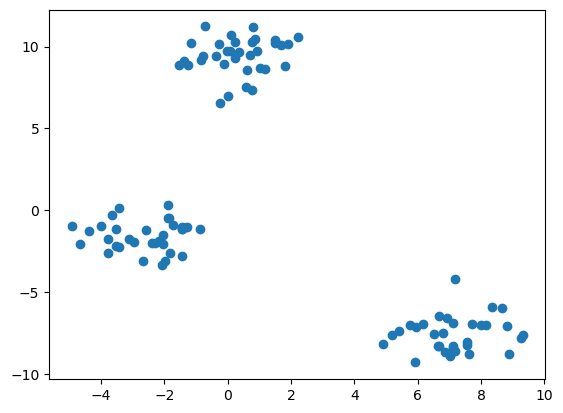

In [24]:
X,y = make_blobs(n_samples= 100, centers= 3, )
plt.scatter(X[:,0],X[:,1])


In [26]:
from sklearn.cluster import KMeans


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


213.33947629859992

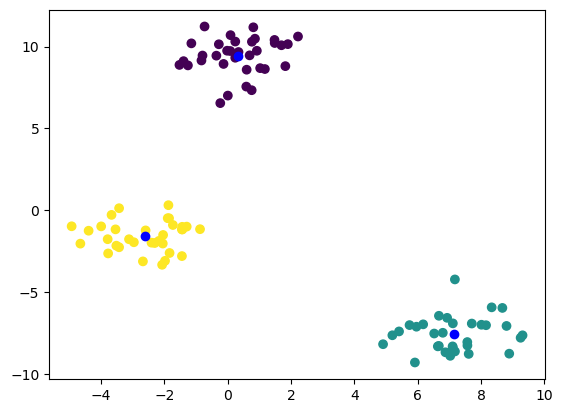

In [33]:
model = KMeans(n_clusters= 3 )
model.fit(X)
model.predict(X)
plt.scatter(X[:,0],X[:,1], c=model.predict(X)) 
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], c='b')
model.inertia_

In [34]:
inertia = []
k_range = range(1, 20)
for k in k_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

Text(0, 0.5, 'cout du modele(inertia)')

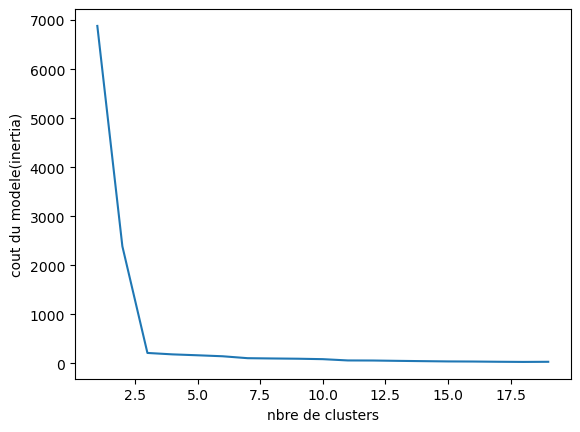

In [35]:
plt.plot(k_range, inertia)
plt.xlabel('nbre de clusters')
plt.ylabel('cout du modele(inertia)')

### detection d'anomalies

##### IsolationForest

In [46]:
T,f = make_blobs(n_samples= 50, centers= 1)
T[-1,:]= np.array([2.25,5])

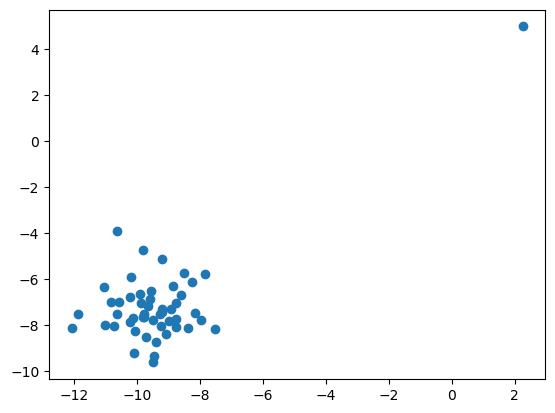

In [47]:
plt.scatter(T[:,0], T[:,1])

In [48]:
from sklearn.ensemble import IsolationForest

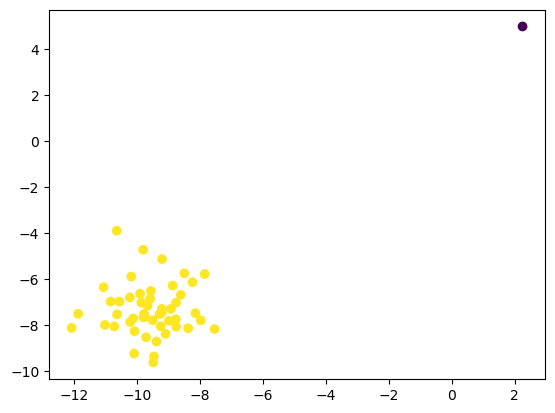

In [53]:
model = IsolationForest(contamination= 0.01)
model.fit(T)
plt.scatter(T[:,0], T[:,1], c= model.predict(T))

In [54]:
from sklearn.datasets import load_digits

In [55]:
digits = load_digits()
images = digits.images
k= digits.data
e= digits.target
print(k.shape)

(1797, 64)


In [64]:
model = IsolationForest(random_state= 0,contamination= 0.02)

In [65]:
model.fit(k)

,n_estimators,100
,max_samples,'auto'
,contamination,0.02
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,0
,verbose,0
,warm_start,False


In [68]:
outliers = model.predict(k) == -1

In [69]:
outliers

array([False, False, False, ..., False, False, False])

Text(0.5, 1.0, '4')

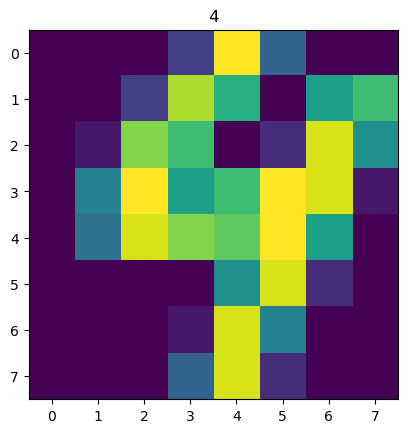

In [79]:
plt.imshow(images[outliers][19])
plt.title(e[outliers][19])

### Reduction de Dimension

##### Analyse en Composante Principale (PCA)

###### 1- Virtualisation de données

In [80]:
from sklearn.decomposition import PCA
model = PCA(n_components= 10)
model.fit_transform(k)

array([[ -1.25946645, -21.27488348,   9.46305462, ...,  -2.55347036,
          0.58184214,  -3.62569695],
       [  7.9576113 ,  20.76869896,  -4.43950604, ...,   4.61593641,
         -3.58745013,   1.07470456],
       [  6.99192297,   9.95598641,  -2.95855808, ...,  16.41519983,
         -0.7192329 ,  -4.25580548],
       ...,
       [ 10.8012837 ,   6.96025223,  -5.59955453, ...,   7.4150719 ,
          3.96158533,  13.06509519],
       [ -4.87210009, -12.42395362,  10.17086635, ...,   4.35789156,
         -3.93924173,  13.14525475],
       [ -0.34438963,  -6.36554919, -10.77370849, ...,  -0.66902071,
          4.11316505,  12.56200443]])

In [81]:
k.shape

(1797, 64)

In [82]:
model = PCA(n_components= 2)
k_reduce = model.fit_transform(k)

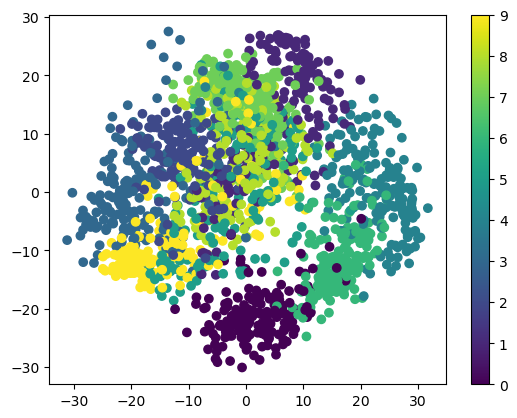

In [84]:
plt.scatter(k_reduce[:,0],k_reduce[:,1], c=e)
plt.colorbar()

In [85]:
model.components_.shape

(2, 64)

###### 2-Compression de données 

In [91]:
model = PCA(n_components= 40)
k_reduce = model.fit_transform(k)

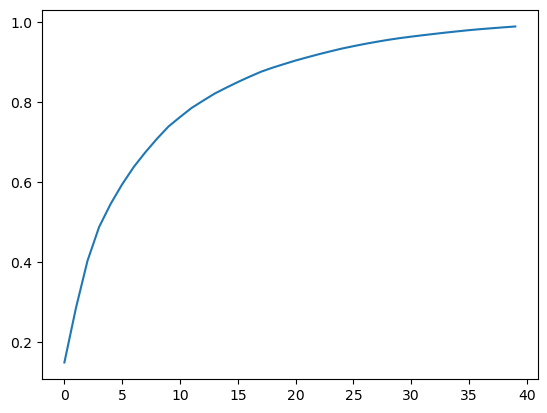

In [92]:
plt.plot(np.cumsum(model.explained_variance_ratio_))

In [93]:
reconvertir= model.inverse_transform(k_reduce)

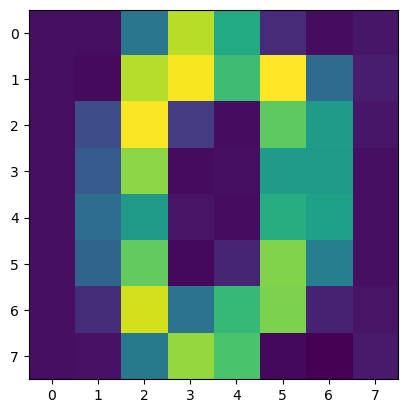

In [97]:
plt.imshow(reconvertir[0].reshape((8,8)))